## Scenario 1 - Age stratification

In [1]:
from mira.metamodel.ops import stratify
from mira.modeling.viz import GraphicalModel
from mira.modeling.acsets.petri import PetriNetModel
from mira.modeling import Model
from mira.metamodel import model_to_json_file, ControlledConversion

### Start with simple SIR model

In [2]:
from mira.examples.sir import sir_parameterized

In [3]:
model_to_json_file(sir_parameterized, 'scenario1_sir_mira.json')

In [4]:
pm = PetriNetModel(Model(sir_parameterized))
pm.to_json_file('scenario1_sir.json', indent=1)

In [5]:
gm = GraphicalModel(Model(sir_parameterized))
gm.write('scenario1_sir.png')

### First stratification into 3 age groups

In [6]:
tm = stratify(sir_parameterized,
         key='age',                            # Stratify by age
         strata=['young', 'middle', 'old'],    # These are the 3 strata needed
         structure=[],                         # No transition between age groups
         cartesian_control=True,               # All age groups can control
         modify_names=True,                    # Make sure we rename concepts
    )

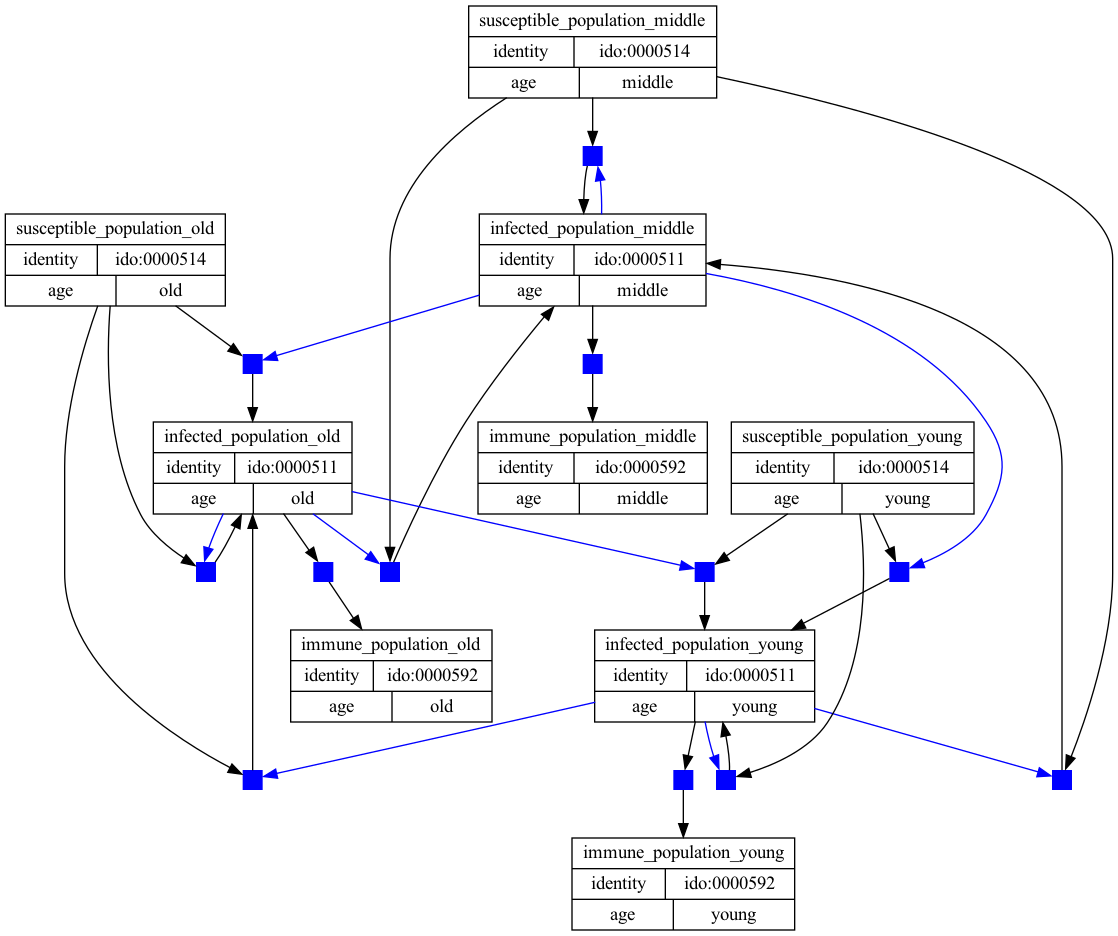

In [7]:
GraphicalModel.for_jupyter(tm, width="50%")

In [8]:
gm = GraphicalModel(Model(tm))
gm.write('scenario1_three_ages.png')

In [9]:
pm = PetriNetModel(Model(tm))
pm.to_json_file('scenario1_three_ages.json', indent=1)

In [10]:
model_to_json_file(tm, 'scenario1_three_ages_mira.json')

### Second stratification into multiple age groups

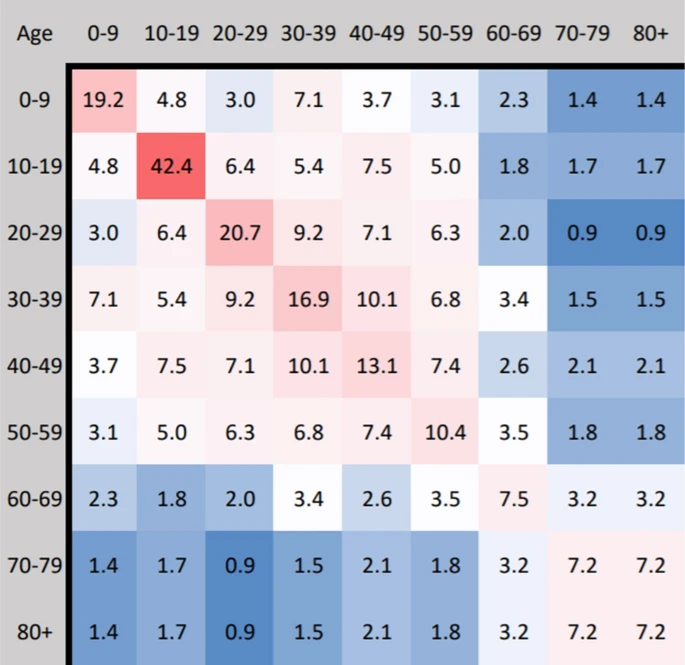

In [11]:
age_groups = ['%d_%d' % (i*10, (i+1)*10-1) for i in range(8)] + ['80']

In [12]:
age_groups

['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80']

Stratification is created such that all age groups can infect each other but there is
no transition between age groups.

In [13]:
tm2 = stratify(sir_parameterized,
         key='age',                            # Stratify by age
         strata=age_groups,                    # These are the strata needed
         structure=[],                         # No transition between age groups
         cartesian_control=True,               # All age groups can control
         modify_names=True,                    # Make sure we rename concepts
    )

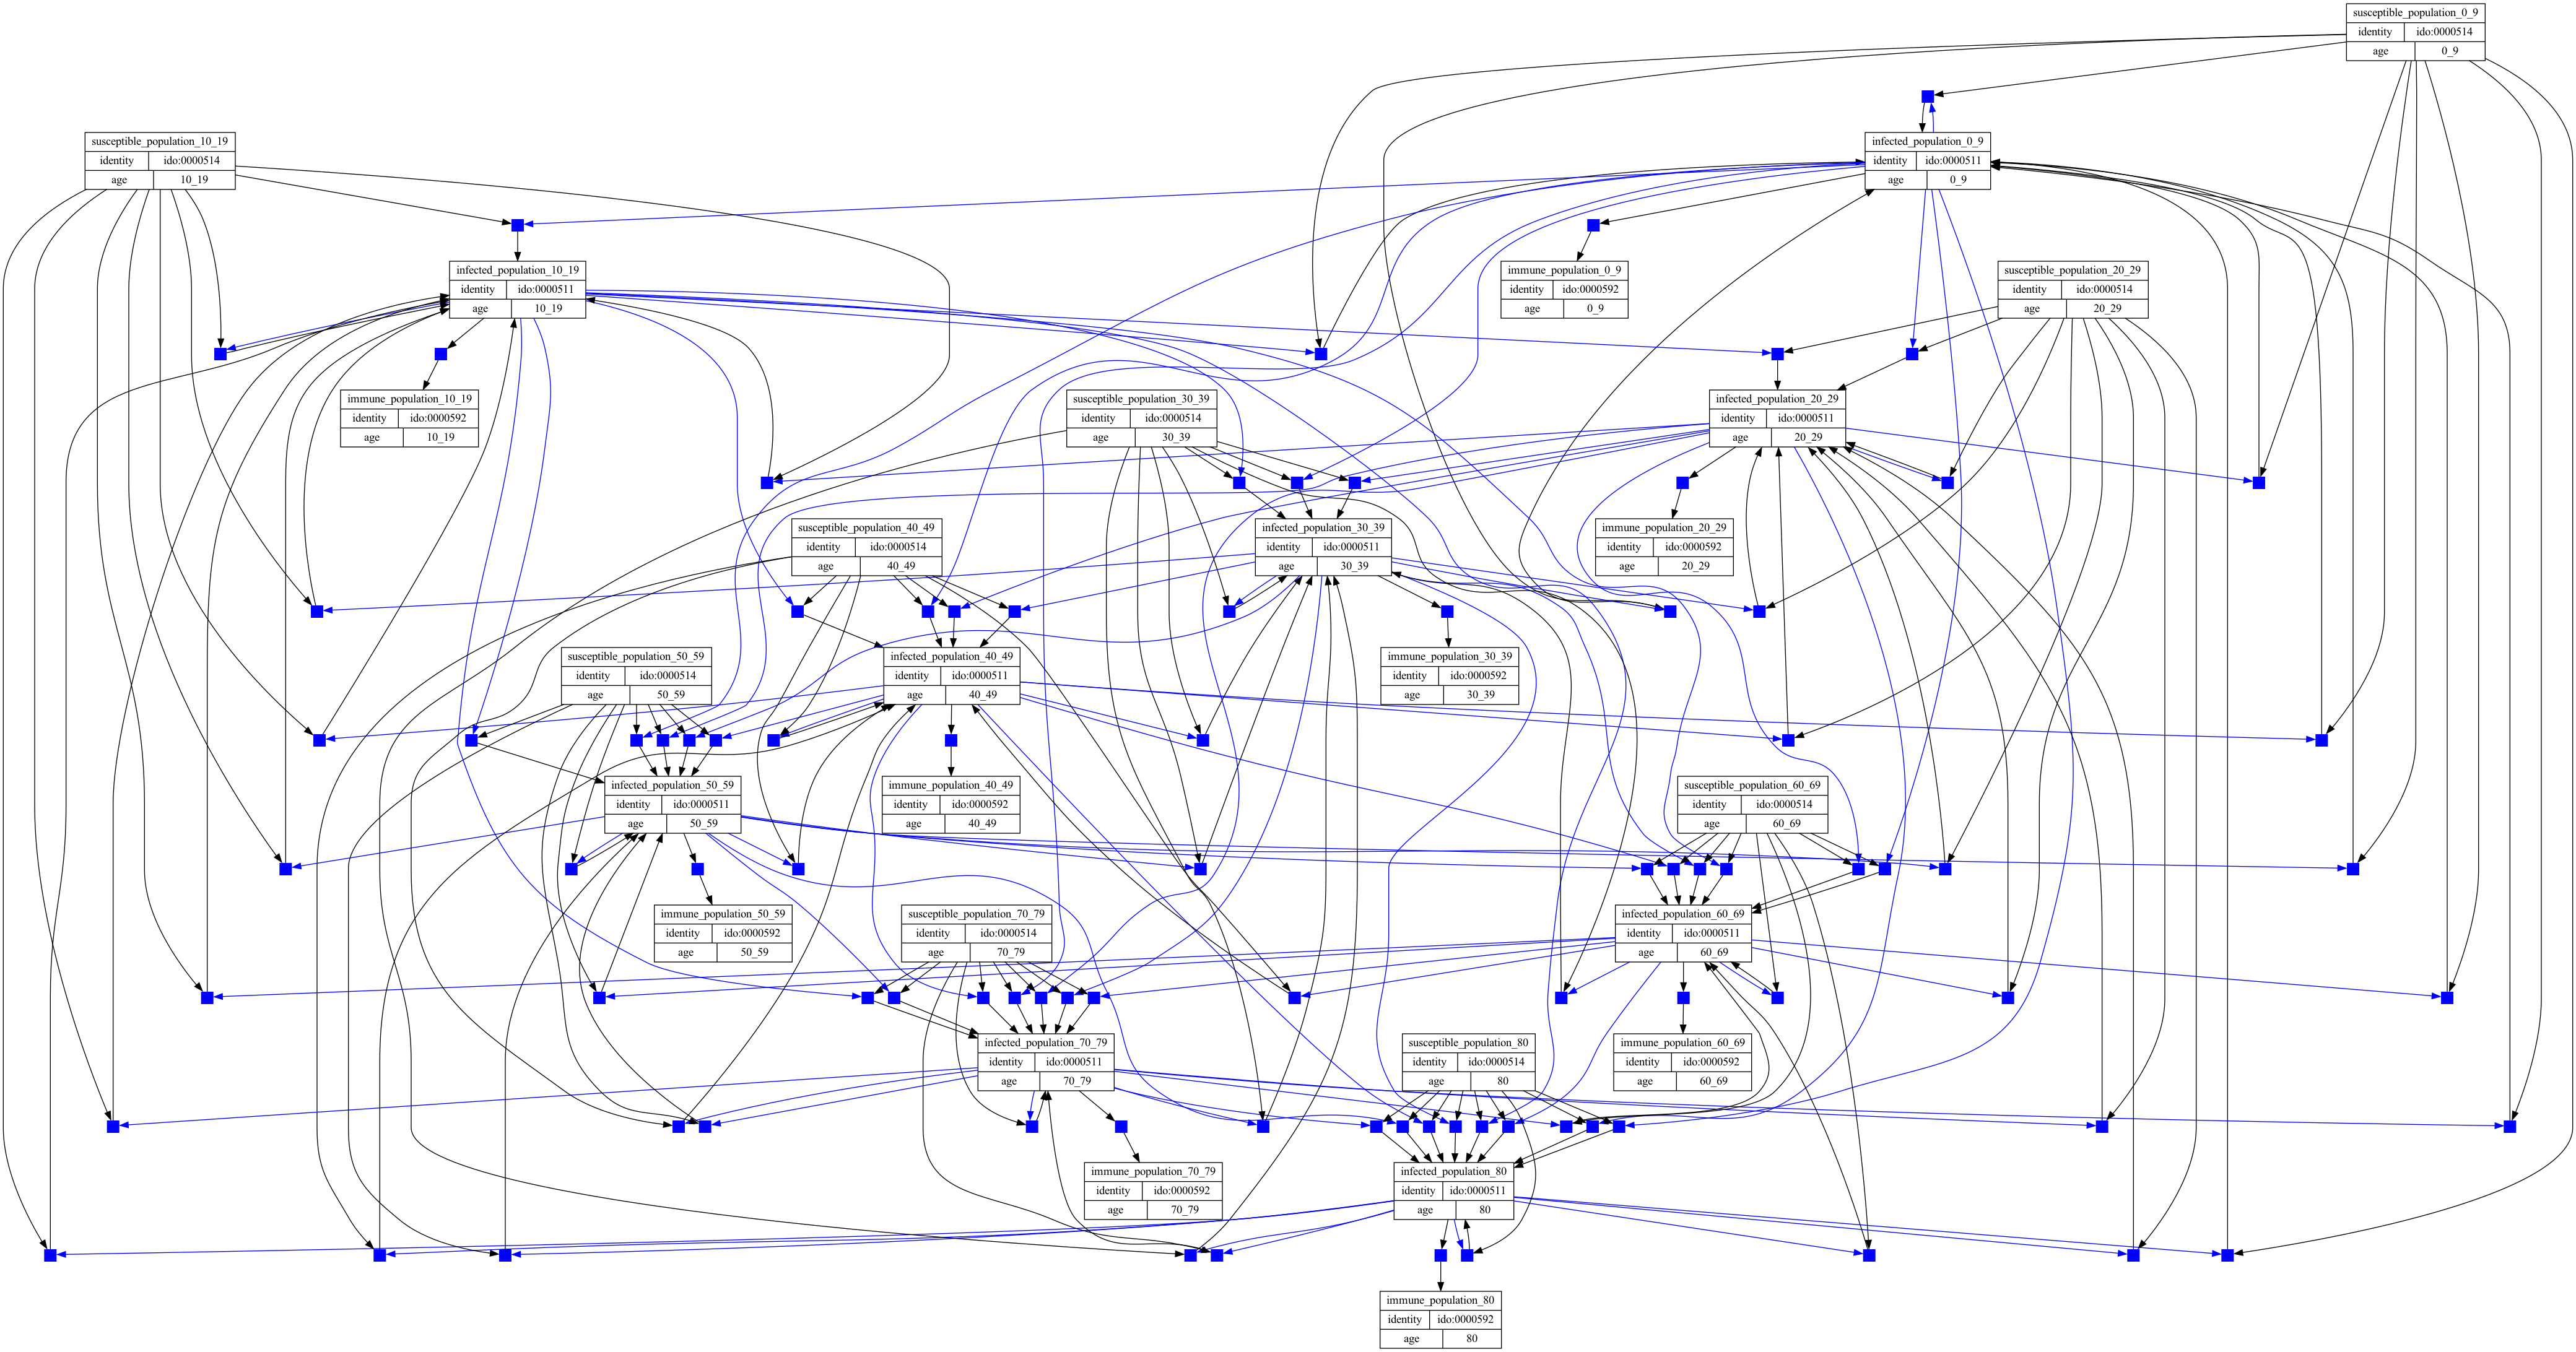

In [14]:
GraphicalModel.for_jupyter(tm2, width="90%")

### Parameterize according to contact matrix

In [15]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/DARPA-ASKEM/program-milestones/'
                     'ce92d07818cc337377fdfc9fa7ae5697b6679dd2/'
                     '6-month-milestone/evaluation/scenario_1/ta_1/figure1-10.1038-s41598-021-94609-3.csv',
                    skipinitialspace=True)
beta = 5 * (1/14)
for template in tm2.templates:
    if isinstance(template, ControlledConversion):
        age1 = template.subject.context['age'].replace('_', '-')
        if age1 == '80':
            age1 = '80+'
        age2 = template.controller.context['age'].replace('_', '-')
        if age2 == '80':
            age2 = '80+'
        cx = df[df.Age==age1][age2].to_list()[0]
        p = list(template.get_parameter_names())[0]
        assert isinstance(cx*beta, float)
        tm2.parameters[p].value = cx * beta

In [16]:
pm = PetriNetModel(Model(tm2))
pm.to_json_file('scenario1_all_ages.json', indent=1)

In [17]:
model_to_json_file(tm2, 'scenario1_all_ages_mira.json')

In [18]:
gm = GraphicalModel(Model(tm2))
gm.write('scenario1_all_ages.png')